In [1]:
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

skip_cv = True
with open(r'./rf_params.pickle', 'rb') as handle:
    best_params = pickle.load(handle)

In [2]:
data = pd.read_csv(r'data/dat.csv')
print(data.shape)
data.sample(10)

(4340, 8)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
2177,Hyundai Verna VTVT 1.6 AT SX Option,2017,1100000,10000,Petrol,Individual,Automatic,First Owner
649,Maruti Swift Dzire AMT ZXI Plus BS IV,2017,710000,8000,Petrol,Individual,Automatic,First Owner
3408,Hyundai i10 Era,2008,125000,102000,Petrol,Individual,Manual,Second Owner
4290,Maruti 800 Std,2004,37500,90000,Petrol,Individual,Manual,Second Owner
3086,Maruti Ertiga VDI,2013,250999,80000,Diesel,Individual,Manual,First Owner
2262,Maruti Swift ZXI BSIV,2016,670000,7104,Petrol,Trustmark Dealer,Manual,First Owner
2245,Hyundai Grand i10 Magna AT,2017,520000,10510,Petrol,Dealer,Automatic,First Owner
2393,Maruti Omni E MPI STD BS IV,2016,240000,5800,Petrol,Individual,Manual,Second Owner
152,Hyundai Getz 1.3 GLS,2008,210000,53772,Petrol,Individual,Manual,First Owner
2480,Maruti Wagon R ZXI 1.2,2019,575000,30000,Petrol,Dealer,Manual,First Owner


<AxesSubplot:xlabel='selling_price', ylabel='Count'>

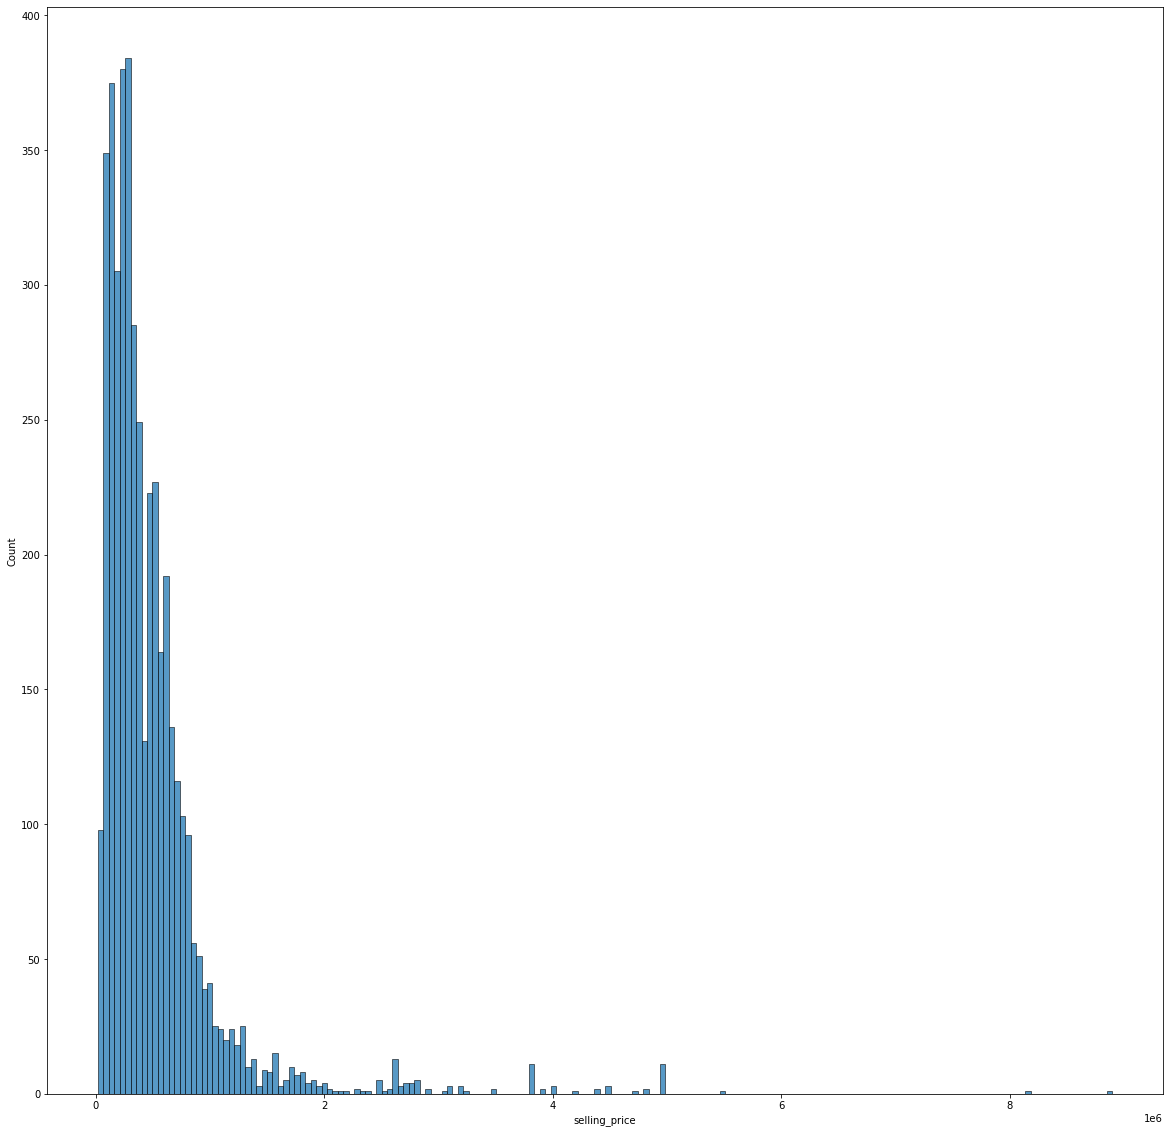

In [51]:
plt.figure(figsize=(20,20))
sns.histplot(data,x='selling_price')

In [3]:
# Check unique values of categorical features
cat_col = data.select_dtypes(include=['object','category']).columns
cat_col

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [4]:
for col in cat_col:
    print(data[col].unique())

['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [5]:
# Check missing / null values
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [6]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [7]:
# Check value counts of unique values
for col in cat_col:
    print(data[col].value_counts())

Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: name, Length: 1491, dtype: int64
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64
Manual       3892
Automatic     448
Name: transmission, dtype: int64
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int6

In [8]:
revised_data = data.copy()
revised_data['brand'] = revised_data['name'].apply(lambda x:x.split(' ')[0])

In [9]:
revised_data = revised_data.drop(columns="name")
revised_data

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda
...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4336,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4337,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti
4338,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai


In [10]:
revised_data['current_year'] = dt.datetime.now().year
revised_data['num_years'] = revised_data['current_year'] - revised_data['year']
revised_data

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,current_year,num_years
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,2021,14
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,2021,14
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,2021,9
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,2021,4
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,2021,7
...,...,...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai,2021,7
4336,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai,2021,7
4337,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti,2021,12
4338,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai,2021,5


In [11]:
final_dataset = revised_data.drop(['year','current_year'],axis=1)
final_dataset.sample(5)

,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,num_years
1113,250000,200000,Diesel,Individual,Manual,Second Owner,Mahindra,8
3479,350000,40000,Petrol,Individual,Manual,Second Owner,Maruti,4
1587,400000,40000,Diesel,Individual,Manual,First Owner,Chevrolet,9
69,280000,350000,Diesel,Individual,Manual,Second Owner,Chevrolet,11
3002,875000,1440,Petrol,Individual,Manual,First Owner,Honda,3


In [12]:
# Convert categorical features to dummies
cat_cols = final_dataset.select_dtypes(include='object').columns
final_dataset = pd.get_dummies(final_dataset,drop_first=True)
final_dataset.sample(5)

,selling_price,km_driven,num_years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,...,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_OpelCorsa,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
1850,760000,55340,6,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1801,565000,47000,5,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4155,180000,30000,12,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4201,700000,49957,4,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2545,295000,80000,9,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0


In [13]:
final_dataset.corr()

,selling_price,km_driven,num_years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,...,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_OpelCorsa,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
selling_price,1.000000,-0.192289,-0.413922,0.282947,-0.005095,-0.042434,-0.269453,-0.236798,0.110176,-0.530205,...,0.354215,0.021603,-0.011460,-0.015427,-0.027335,-0.003078,-0.114574,0.162161,-0.009094,0.107745
km_driven,-0.192289,1.000000,0.419688,0.285396,-0.001372,0.036652,-0.291139,0.182663,-0.089858,0.120226,...,-0.044987,0.059910,0.006476,0.009339,-0.075188,0.044299,0.062762,0.163598,0.029182,0.013371
num_years,-0.413922,0.419688,1.000000,-0.121424,0.025540,0.051266,0.114908,0.173703,-0.100225,0.143800,...,-0.002948,0.019928,-0.025484,0.051406,-0.102707,0.031330,0.050435,0.000437,-0.008914,-0.015560
fuel_Diesel,0.282947,0.285396,-0.121424,1.000000,-0.015063,-0.072422,-0.970934,-0.035314,-0.007911,-0.048098,...,0.059961,0.025097,0.046838,-0.021304,0.011686,0.071495,0.089971,0.138290,0.062169,0.030612
fuel_Electric,-0.005095,-0.001372,0.025540,-0.015063,1.000000,-0.001108,-0.014856,-0.026118,-0.002355,-0.044746,...,-0.001369,-0.000565,-0.001857,-0.000326,-0.002832,-0.001915,-0.004573,0.068007,-0.002414,-0.000461
fuel_LPG,-0.042434,0.036652,0.051266,-0.072422,-0.001108,1.000000,-0.071427,0.035122,-0.011324,0.024764,...,-0.006581,-0.002716,-0.008930,-0.001567,-0.013619,-0.009209,-0.021986,-0.016294,-0.011605,-0.002217
fuel_Petrol,-0.269453,-0.291139,0.114908,-0.970934,-0.014856,-0.071427,1.000000,0.029845,0.012489,0.039614,...,-0.057313,-0.024005,-0.043238,0.021942,-0.006184,-0.067787,-0.082773,-0.133901,-0.057491,-0.029722
seller_type_Individual,-0.236798,0.182663,0.173703,-0.035314,-0.026118,0.035122,0.029845,1.000000,-0.266904,0.214163,...,-0.089900,0.007354,0.009513,0.012481,-0.015089,-0.029157,0.117464,-0.002439,-0.044388,-0.017300
seller_type_Trustmark Dealer,0.110176,-0.089858,-0.100225,-0.007911,-0.002355,-0.011324,0.012489,-0.266904,1.000000,-0.042346,...,-0.013988,-0.005772,-0.018980,-0.003331,-0.012074,-0.019573,-0.046729,0.072664,-0.024665,-0.004712
transmission_Manual,-0.530205,0.120226,0.143800,-0.048098,-0.044746,0.024764,0.039614,0.214163,-0.042346,1.000000,...,-0.248829,-0.007758,0.035224,0.007285,0.038100,-0.109648,0.082996,-0.048920,-0.048616,-0.089523


In [14]:
#plt.figure(figsize=(20,20))
#sns.pairplot(final_dataset)

Index(['selling_price', 'km_driven', 'num_years', 'fuel_Diesel',
       'fuel_Electric', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'brand_Audi', 'brand_BMW',
       'brand_Chevrolet', 'brand_Daewoo', 'brand_Datsun', 'brand_Fiat',
       'brand_Force', 'brand_Ford', 'brand_Honda', 'brand_Hyundai',
       'brand_Isuzu', 'brand_Jaguar', 'brand_Jeep', 'brand_Kia', 'brand_Land',
       'brand_MG', 'brand_Mahindra', 'brand_Maruti', 'brand_Mercedes-Benz',
       'brand_Mitsubishi', 'brand_Nissan', 'brand_OpelCorsa', 'brand_Renault',
       'brand_Skoda', 'brand_Tata', 'brand_Toyota', 'brand_Volkswagen',
       'brand_Volvo'],
      dtype='object')


<AxesSubplot:>

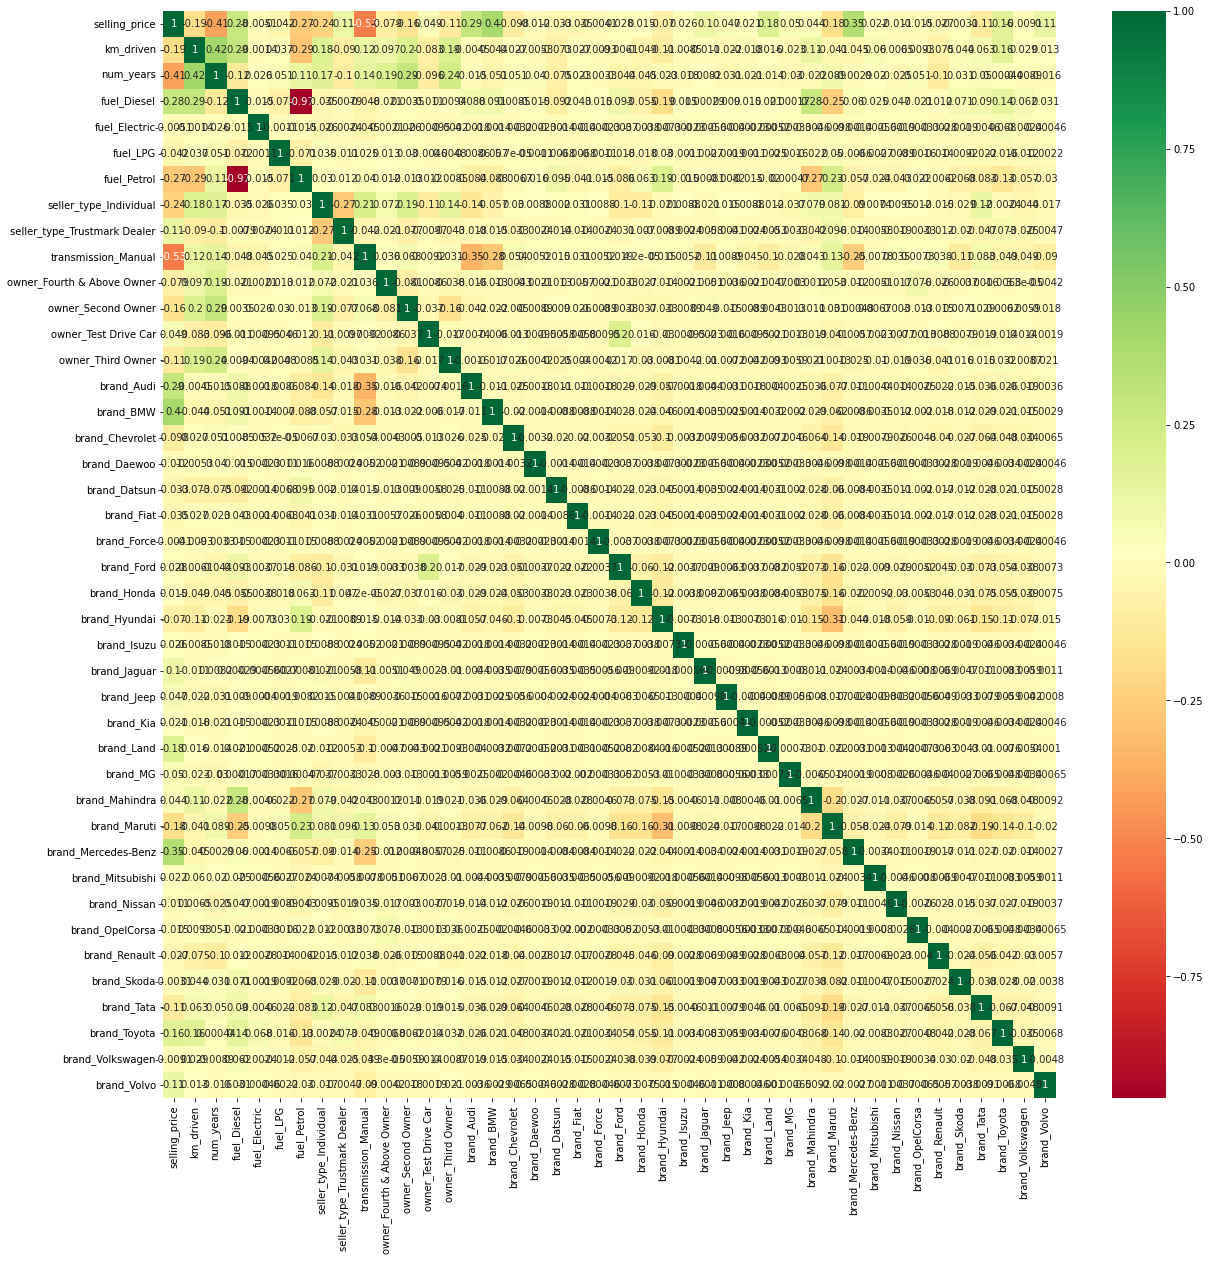

In [15]:
plt.figure(figsize=(20,20))
corrmat = final_dataset.corr()
top_corr = corrmat.index
print(top_corr)

sns.heatmap(final_dataset[top_corr].corr(),annot=True,cmap='RdYlGn')

In [16]:
y = final_dataset.pop('selling_price')
x = final_dataset
x.head()

,km_driven,num_years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,...,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_OpelCorsa,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,70000,14,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,50000,14,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,100000,9,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,46000,4,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,141000,7,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

In [18]:
#feature importance

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [19]:
print(model.feature_importances_)

[9.64794137e-02 2.03344847e-01 1.25842930e-01 4.04704948e-05
 2.34744200e-05 2.13308394e-04 3.25733705e-02 4.53491476e-03
 2.83541290e-01 8.07291548e-04 1.23356268e-02 3.70022726e-04
 3.40583305e-03 3.71028560e-02 3.84957803e-02 2.12715887e-03
 7.27398111e-08 6.37541996e-04 4.46535065e-04 7.89139709e-06
 1.19490210e-02 4.04168620e-03 3.19879374e-03 2.94414229e-04
 7.78442849e-03 1.45392619e-03 2.14566062e-04 2.19160834e-02
 1.57326381e-03 3.64743427e-03 3.14430753e-03 5.08236746e-02
 1.22324732e-03 6.26739621e-04 2.70888983e-06 1.37509193e-03
 9.35031259e-04 6.98953477e-03 2.80190908e-02 1.35517839e-03
 7.10114825e-03]


<AxesSubplot:>

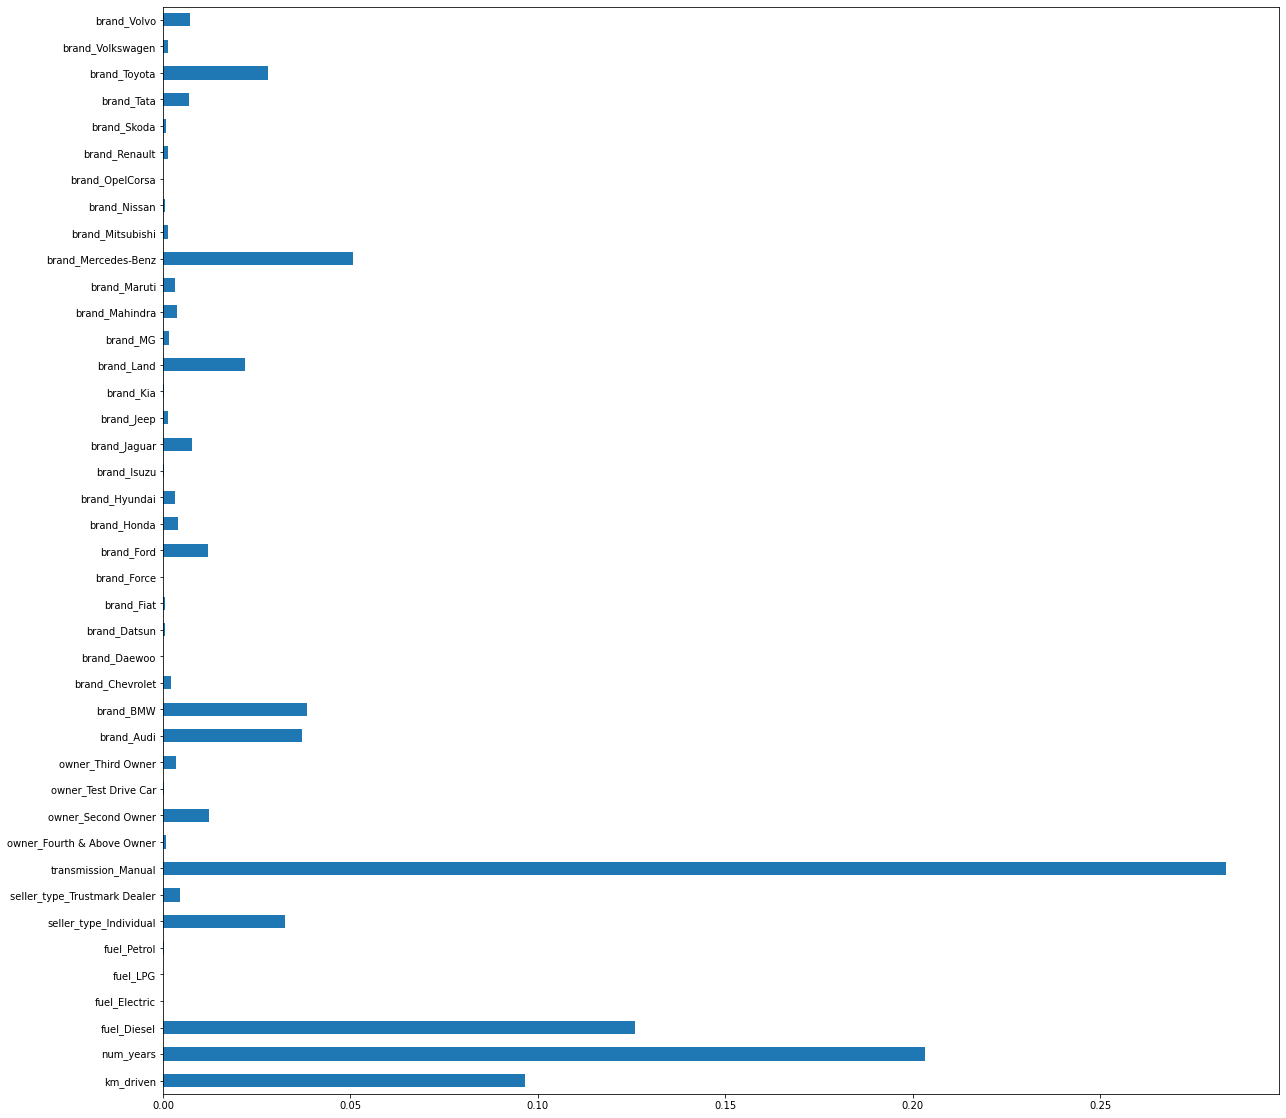

In [21]:
#sns.pairplot(final_dataset)
plt.figure(figsize=(20,20))
feat_importances = pd.Series(model.feature_importances_,index = x.columns)
feat_importances.plot(kind='barh')

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape

(3472, 41)

## Random Forest Regressor

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
rf_baseline = RandomForestRegressor()

rf_baseline_scores = cross_val_score(rf_baseline,x_train,y_train,cv=5,
                                    scoring='neg_mean_absolute_error')
print(-1*rf_baseline_scores)
print(rf_baseline.get_params())

[128633.80760169 120756.28298906 141066.43123453 116710.39079206
 128583.43564711]
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [24]:
if not skip_cv:
    #Hyperparameter tuning
    from sklearn.model_selection import RandomizedSearchCV
    n_estimators = [int(x) for x in np.linspace(start=50,stop=1200,num=12)]
    max_feat = ['auto','sqrt']
    max_depth = [int(x) for x in np.linspace(5,30,num=6)]
    min_samples_split = [2,5,10,15,100]
    min_samples_leaf = [1,2,5,10]

    random_grid = {
        'n_estimators':n_estimators,
        'max_features':max_feat,
        'max_depth':max_depth,
        'min_samples_split':min_samples_split,
        'min_samples_leaf':min_samples_leaf
    }
    random_grid

In [ ]:
#import sklearn
#sorted(sklearn.metrics.SCORERS.keys())

In [25]:
if not skip_cv:
    rf = RandomForestRegressor()
    rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,
                                  scoring='neg_mean_squared_error',cv=5,verbose=2,
                                  random_state=42,n_jobs=-1)
    rf_random.fit(x_train,y_train)


In [ ]:
#rf_random.best_params_

In [26]:
if not skip_cv:
    #Now tune with GridSearchCV on a smaller space
    from sklearn.model_selection import GridSearchCV
    n_estimators = [800,850,900,950,1000]
    max_feat = ['auto','sqrt']
    max_depth = [int(x) for x in np.linspace(15,35,num=5)]
    min_samples_split = [1,2,3]
    min_samples_leaf = [1,2,3]

    gridsearch_grid = {
        'n_estimators':n_estimators,
        'max_features':max_feat,
        'max_depth':max_depth,
        'min_samples_split':min_samples_split,
        'min_samples_leaf':min_samples_leaf
    }
    gridsearch_grid

In [27]:
if not skip_cv:
    rf = RandomForestRegressor()
    rf_grid = GridSearchCV(estimator=rf,param_grid=gridsearch_grid,
                            scoring='neg_mean_squared_error',cv=5,verbose=3,
                            n_jobs=-2)
    rf_grid.fit(x_train,y_train)

In [28]:
if not skip_cv:
    best_params=rf_grid.best_params_
else:
    best_params=best_params
best_params

{'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 950}

In [29]:
final_model = RandomForestRegressor()
final_model.set_params(max_depth= best_params.get('max_depth'),
 max_features= best_params.get('max_features'),
 min_samples_leaf= best_params.get('min_samples_leaf'),
 min_samples_split= best_params.get('min_samples_split'),
 n_estimators= best_params.get('n_estimators'))
final_model.fit(x_train,y_train)
predictions = final_model.predict(x_test)

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

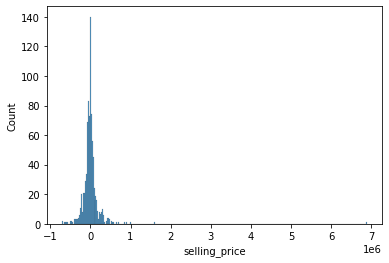

In [30]:
sns.histplot(y_test-predictions)

D:\Git\vehicle-dataset\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='selling_price'>

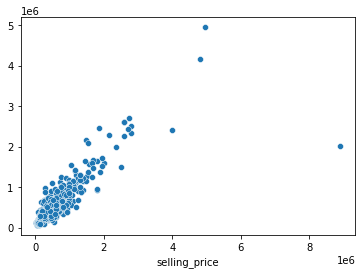

In [31]:
sns.scatterplot(y_test,predictions)

In [32]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from statistics import median
err = np.sqrt(mean_squared_error(y_test,predictions))
err = mean_absolute_error(y_test,predictions)
err_vec = y_test-predictions
print(median(err_vec))
print(err)

-10653.867662912802
113798.62125616455


In [33]:
print(x_test.loc[err_vec.loc[y_test>8e+06].index,:])
print(y_test.loc[err_vec.loc[y_test>8e+06].index])

      km_driven  num_years  fuel_Diesel  fuel_Electric  fuel_LPG  fuel_Petrol  \
3872      13000          5            0              0         0            1   

      seller_type_Individual  seller_type_Trustmark Dealer  \
3872                       0                             0   

      transmission_Manual  owner_Fourth & Above Owner  ...  \
3872                    0                           0  ...   

      brand_Mercedes-Benz  brand_Mitsubishi  brand_Nissan  brand_OpelCorsa  \
3872                    0                 0             0                0   

      brand_Renault  brand_Skoda  brand_Tata  brand_Toyota  brand_Volkswagen  \
3872              0            0           0             0                 0   

      brand_Volvo  
3872            0  

[1 rows x 41 columns]
3872    8900000
Name: selling_price, dtype: int64


In [34]:
print(data.loc[err_vec.loc[y_test>8e+06].index,:])

                                          name  year  selling_price  \
3872  Audi RS7 2015-2019 Sportback Performance  2016        8900000   

      km_driven    fuel seller_type transmission        owner  
3872      13000  Petrol      Dealer    Automatic  First Owner  


In [42]:
# Checking if outliers also exist in train data
audi_index=x_train.loc[x_train['brand_Audi']==1].index.values
y_train[audi_index]

2323    3100000
573     1580000
554     1580000
604     1300000
3458    1200000
1479    3256000
3851    2575000
2813    1150000
611     1580000
2250    1300000
1078    1750000
1080    1750000
1835    1580000
1033    1300000
2295    3899000
930     1300000
2685    1100000
1462    1250000
3873    3200000
3783     650000
3082     850000
2574    2800000
1847    1300000
2578    1150000
1410    2300000
3848    1750000
2257    1580000
3842    1580000
585     1300000
963     4700000
431     1350000
592     1580000
566     1300000
94      1470000
4304    3899000
918     1580000
899     1580000
3094    1295000
1065    3100000
2738    1580000
1081    1850000
1077    1580000
3854    1850000
35      1735000
1705    3500000
959     2700000
623     1300000
3843    1750000
Name: selling_price, dtype: int64

In [44]:
audi_test_index=x_test.loc[x_test['brand_Audi']==1].index.values
y_test[audi_test_index]
x_test.loc[x_test['brand_Audi']==1]

,km_driven,num_years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,...,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_OpelCorsa,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
96,49000,8,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4163,118000,9,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
911,58500,8,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
721,42215,7,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2238,86000,8,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2572,34000,7,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32,175900,10,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99,53000,8,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3872,13000,5,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44,78000,12,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
data.loc[(revised_data['seller_type']=='Dealer') & (revised_data['brand']=='Audi')]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
32,Audi Q5 2.0 TDI,2011,1190000,175900,Diesel,Dealer,Automatic,First Owner
35,Audi A6 2.0 TDI Design Edition,2013,1735000,50000,Diesel,Dealer,Automatic,First Owner
44,Audi Q7 35 TDI Quattro Premium,2009,1250000,78000,Diesel,Dealer,Automatic,Third Owner
94,Audi A6 2.0 TDI Premium Plus,2014,1470000,34000,Diesel,Dealer,Automatic,Second Owner
96,Audi A8 4.2 TDI,2013,2800000,49000,Diesel,Dealer,Automatic,First Owner
99,Audi A4 2.0 TDI 177 Bhp Premium Plus,2013,1150000,53000,Diesel,Dealer,Automatic,First Owner
554,Audi A4 3.0 TDI Quattro,2013,1580000,86000,Diesel,Dealer,Automatic,First Owner
566,Audi A6 2.0 TDI Premium Plus,2013,1300000,58500,Diesel,Dealer,Automatic,First Owner
573,Audi A4 3.0 TDI Quattro,2013,1580000,86000,Diesel,Dealer,Automatic,First Owner
585,Audi A6 2.0 TDI Premium Plus,2013,1300000,58500,Diesel,Dealer,Automatic,First Owner


In [ ]:
best_params = {'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 950}

import pickle
with open(r'./rf_params.pickle', 'wb') as handle:
    pickle.dump(best_params, handle, protocol=pickle.HIGHEST_PROTOCOL)
